In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv('drugs.csv')

In [3]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [4]:
df.shape

(200, 6)

In [5]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [6]:
x = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
x[0:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

In [7]:
from sklearn import preprocessing

In [8]:
dum_sex = preprocessing.LabelEncoder()
dum_sex.fit(['F', 'M'])
x[:,1] = dum_sex.transform(x[:,1])

dum_bp = preprocessing.LabelEncoder()
dum_bp.fit(['LOW', 'NORMAL', 'HIGH',])
x[:,2] = dum_bp.transform(x[:,2])

dum_chol = preprocessing.LabelEncoder()
dum_chol.fit(['NORMAL', 'HIGH'])
x[:,3] = dum_chol.transform(x[:,3])

x[0:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

In [9]:
y = df['Drug']
y

0      drugY
1      drugC
2      drugC
3      drugX
4      drugY
       ...  
195    drugC
196    drugC
197    drugX
198    drugX
199    drugX
Name: Drug, Length: 200, dtype: object

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 3)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(140, 5)
(140,)
(60, 5)
(60,)


In [12]:
drugTree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4)
drugTree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [13]:
drugTree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [14]:
predTree = drugTree.predict(x_test)
print(predTree[0:5])
print(y_test[0:5])

['drugY' 'drugX' 'drugX' 'drugX' 'drugX']
40     drugY
51     drugX
139    drugX
197    drugX
170    drugX
Name: Drug, dtype: object


In [15]:
from sklearn import metrics
import matplotlib.pyplot as plt

In [16]:
#Evaluate the accuracy of the model
print(f"Decision tree accuracy: {metrics.accuracy_score(y_test, predTree)}")

Decision tree accuracy: 0.9833333333333333


In [17]:
from io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree

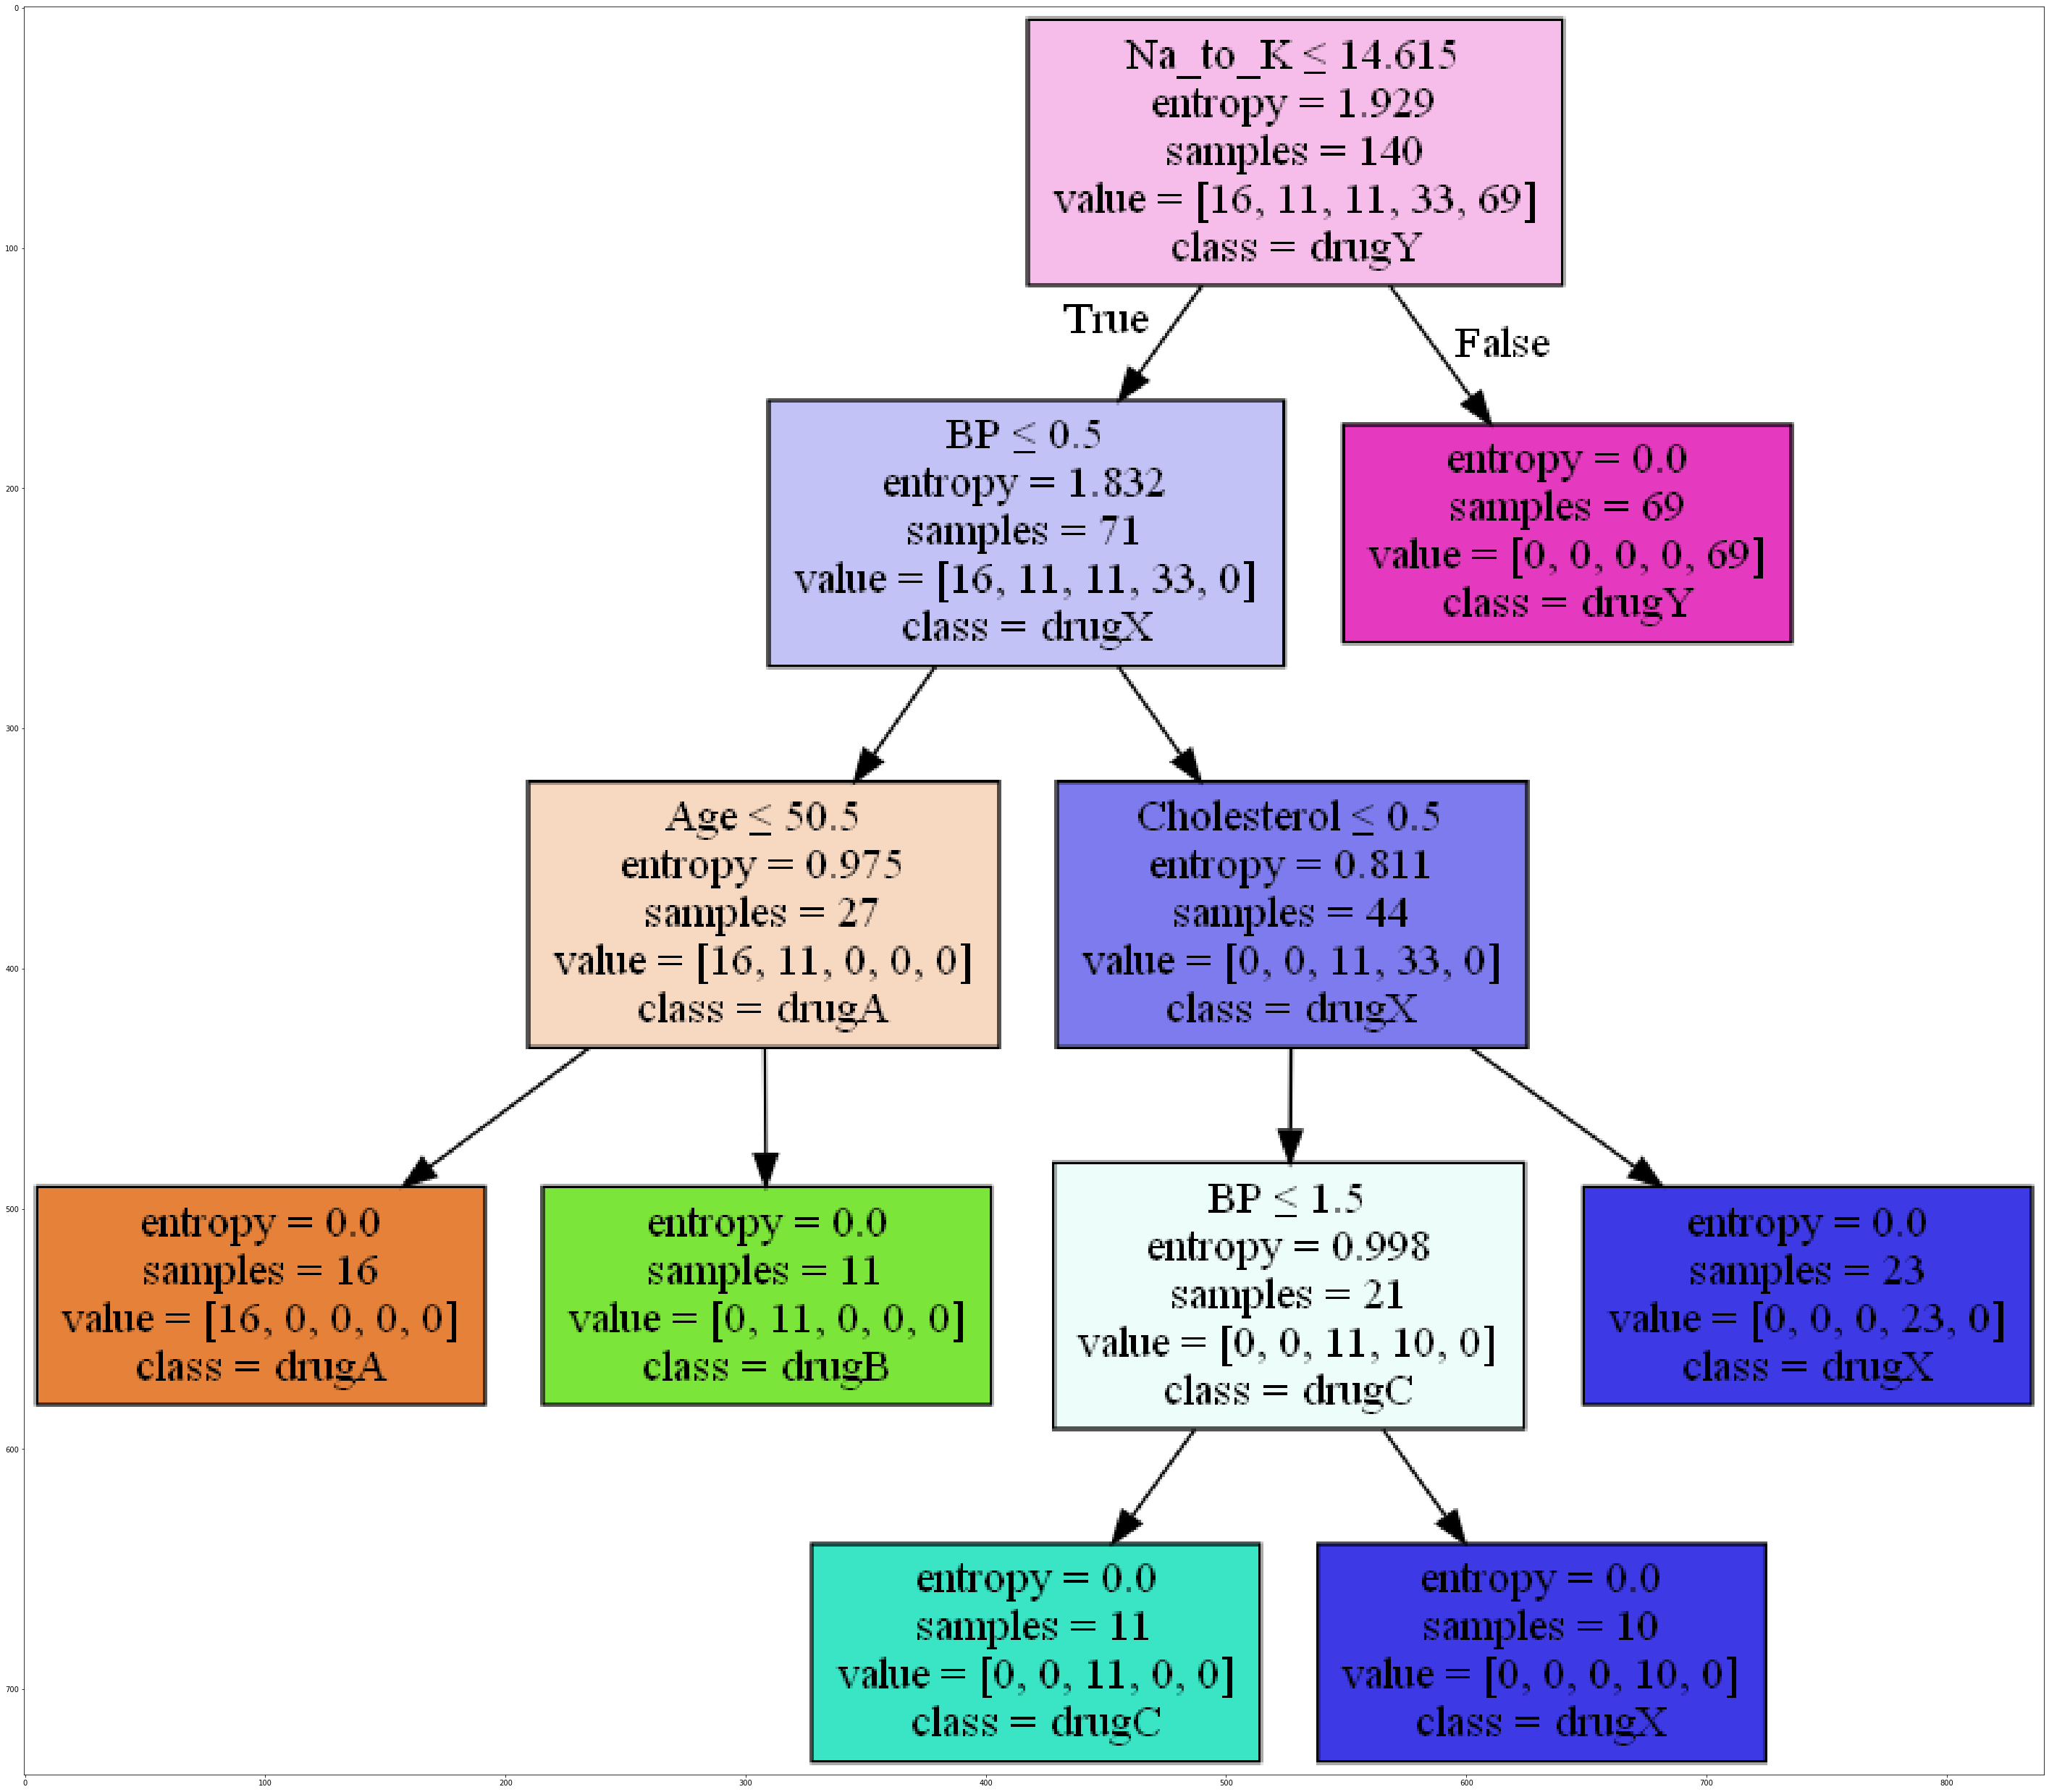

In [20]:
dot_data = StringIO()
filename = 'drugtree.png'
featureNames = df.columns[0:5]
out = tree.export_graphviz(drugTree, feature_names = featureNames, out_file = dot_data, class_names = np.unique(y_train), filled = True, special_characters = True, rotate = False)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize = (50, 50))
plt.imshow(img, interpolation= 'nearest')